# From Parameter Estimation to Hypothesis Testing:
# Building a Bayesian A/B Test

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from scipy.stats import norm, beta, uniform

Our initial Prior probability distribution will be Beta(3, 7)

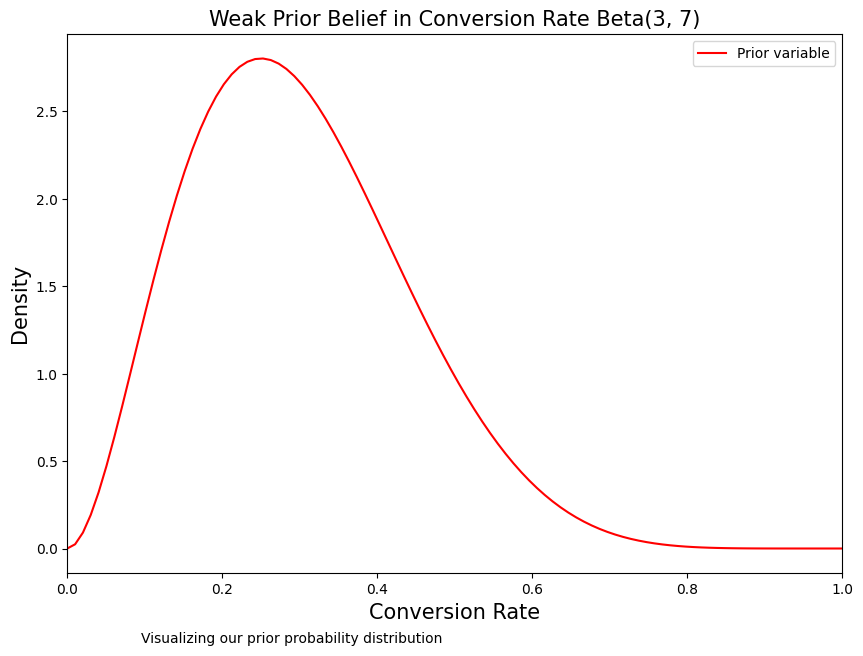

In [3]:
# https://vitalflux.com/beta-distribution-explained-with-python-examples/
#
# Set the shape paremeters
#
weak_prior_alpha, weak_prior_beta = 3, 7

#
# Generate the value between
#
prior_x = np.linspace(beta.ppf(0.0, weak_prior_alpha, weak_prior_beta),
                         beta.ppf(1.0, weak_prior_alpha, weak_prior_beta), 100)

#
# Plot the beta distribution
#
plt.figure(figsize=(10,7))
plt.xlim(0.0, 1.0)
plt.plot(prior_x, beta.pdf(prior_x, weak_prior_alpha, weak_prior_beta), 'r-',
        label = 'Prior variable')
plt.title('Weak Prior Belief in Conversion Rate Beta(3, 7)', fontsize='15')
plt.xlabel('Conversion Rate', fontsize='15')
plt.ylabel('Density', fontsize='15')
plt.legend()
plt.figtext(0.5, 0.01, 'Visualizing our prior probability distribution', wrap=True, horizontalalignment='right', fontsize=10)
plt.show()

Email Click-through Rates

|   |Clicked   |Not clicked   |Observation conversion rate   |   |
|---|---|---|---|---|
|Variant A   | 36  | 114  | 0.24  |   |
|Variant B   |  50 | 100  | 0.33  |   |

Beta(&alpha;<sub>posterior</sub>, &beta;<sub>posterior</sub>) = Beta(&alpha;<sub>likelihood</sub> + &alpha;<sub>prior</sub>, &beta;<sub>likelihood</sub> + &beta;<sub>prior</sub>)

Where

&alpha;<sub>prior</sub> = 3
&beta;<sub>prior</sub> = 7

For variant A

&alpha;<sub>likelihood</sub> = 36
&beta;<sub>likelihood</sub> = 114

For variant B

&alpha;<sub>likelihood</sub> = 50
&beta;<sub>likelihood</sub> = 100


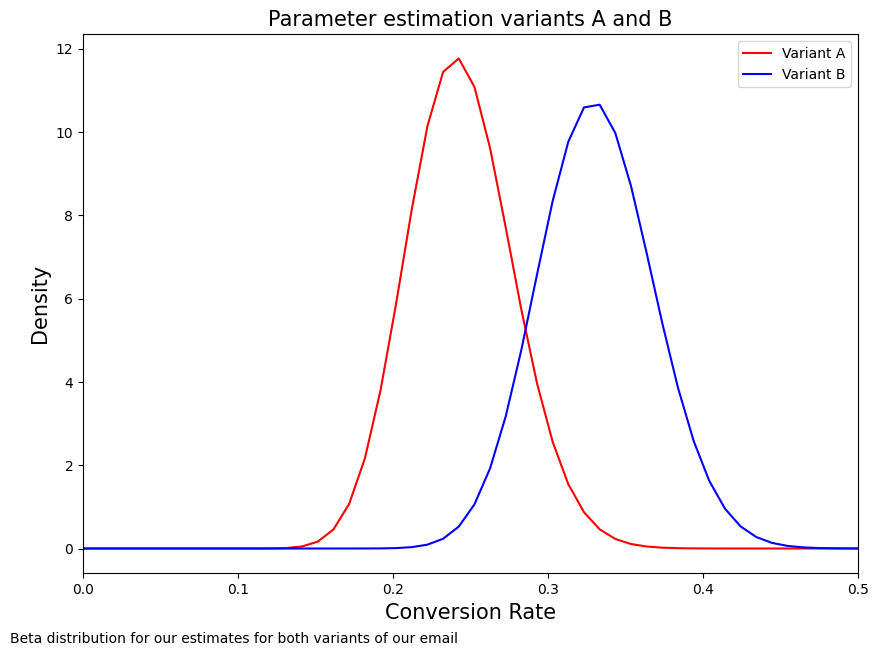

In [4]:
# https://vitalflux.com/beta-distribution-explained-with-python-examples/
#
# Set the shape paremeters
#
variant_a_alpha, variant_a_beta = 36, 114
variant_b_alpha, variant_b_beta = 50, 100

weak_prior_alpha, weak_prior_beta = 3, 7

#
# Generate the value between
#
variant_a_x = np.linspace(beta.ppf(0.0, variant_a_alpha + weak_prior_alpha, variant_a_beta + weak_prior_beta),
                         beta.ppf(1.0, variant_a_alpha + weak_prior_alpha, variant_a_beta + weak_prior_beta), 100)

variant_b_x = np.linspace(beta.ppf(0.0, variant_b_alpha + weak_prior_alpha, variant_b_beta + weak_prior_beta),
                         beta.ppf(1.0, variant_b_alpha + weak_prior_alpha, variant_b_beta + weak_prior_beta), 100)

#
# Plot the beta distribution
#
plt.figure(figsize=(10,7))
plt.xlim(0.0, 0.5)
plt.plot(variant_a_x, beta.pdf(variant_a_x, variant_a_alpha + weak_prior_alpha, variant_a_beta + weak_prior_beta), 'r-',
        label = 'Variant A')
plt.plot(variant_b_x, beta.pdf(variant_b_x, variant_b_alpha + weak_prior_alpha, variant_b_beta + weak_prior_beta), 'b-',
        label = 'Variant B')
plt.title('Parameter estimation variants A and B', fontsize='15')
plt.xlabel('Conversion Rate', fontsize='15')
plt.ylabel('Density', fontsize='15')
plt.legend()
plt.figtext(0.5, 0.01, 'Beta distribution for our estimates for both variants of our email',
            wrap=True, horizontalalignment='right', fontsize=10)
plt.show()

# Monte Carlo Simulations

*Monte Carlo simulation* is any technique that makes use of random sampling to solve a problem.

The accurate answer to which email variant generates a higher click through rate lies somewhere in the intersection of the distributions of A and B.

By sampling many times from the distributions of A and B, we can calculate the percentage of cases where B is better than A. This is roughly equivalent to a t-test 


In [5]:
no_trials = 100000

In [6]:
variant_a_samples = beta(variant_a_alpha + weak_prior_alpha,
                               variant_a_beta + weak_prior_beta).rvs(no_trials)

variant_b_samples = beta(variant_b_alpha + weak_prior_alpha,
                               variant_b_beta + weak_prior_beta).rvs(no_trials)

In [7]:
b_superior = sum(variant_b_samples > variant_a_samples) / no_trials

In [8]:
b_superior

0.95856

In [9]:
f'Variant B is better than A in {b_superior:.2%} of trials'

'Variant B is better than A in 95.86% of trials'

# Exercise 1

<b>
A director of marketing with many years of experience tells you he believes very strongly that the variant without images (B) won't perform any differently than the originial variant. How could you account for this in our model? Implement the change and see how your final conclusion changes as well?
</b>

We account for this by increasing the strength of our prior

In [10]:
strong_prior_alpha, strong_prior_beta = 300, 700

In [11]:
variant_a_samples = beta(variant_a_alpha + strong_prior_alpha,
                               variant_a_beta + strong_prior_beta).rvs(no_trials)

variant_b_samples = beta(variant_b_alpha + strong_prior_alpha,
                               variant_b_beta + strong_prior_beta).rvs(no_trials)


In [12]:
b_superior = sum(variant_b_samples > variant_a_samples) / no_trials

In [13]:
b_superior

0.7401

In [14]:
f'Using a stronger prior has resulted in a b_superior oof {b_superior:.2%} which is ' \
'smaller/worst than the b_superior calculated based on the initial weaker prior'

'Using a stronger prior has resulted in a b_superior oof 74.01% which is smaller/worst than the b_superior calculated based on the initial weaker prior'

# Exercise 2

<b>
The lead designer sees your results and insists that there's no way that variant B should perform better with no images. She feels that you should assume the conversion rate for variant B is closer to 20 percent than 30 percent. Implement a solution for this and again review the results of your analysis
</b>    

We will keep to the strong priors for variant A and set the priors for Variant B to be 20, 80 to reflect the opinion of the lead designer

In [15]:
variant_a_prior_alpha, variant_a_prior_beta = 30, 70

variant_b_prior_alpha, variant_b_prior_beta = 20, 80

In [16]:
variant_a_samples = beta.rvs(variant_a_alpha + variant_a_prior_alpha,
                             variant_a_beta + variant_a_prior_beta,
                             size=no_trials)

variant_b_samples = beta.rvs(variant_b_alpha + variant_b_prior_alpha,
                             variant_b_beta + variant_b_prior_beta,
                             size=no_trials)

In [17]:
b_superior = sum(variant_b_samples > variant_a_samples) / no_trials

In [18]:
b_superior

0.65662

After changing the priors based on the opinion of the lead designer, variant B still performs better than variant A

# Exercise 3

<b>
Assume that being 95 percent certain means that you're more or less "concinved" of a hypothesis. Also assume there's no longer any limit on the number of emails you can send in your test. If the true conversion rate for A is 0.25 and for B is 0.3, explore how many samples it would take to convince the director of marketing that B was in fact superior. Explore the same for the lead designer.
</b>

For director of marketing

In [19]:
np.random.seed(seed=1976)

a_tcr = 0.25
b_tcr = 0.3

no_samples = 0

b_superior = -1

while(b_superior < 0.95):
    no_samples += 100
    
    a_random_samples = uniform.rvs(size=(no_samples//2))
    b_random_samples = uniform.rvs(size=(no_samples//2))
    
    a_results = a_random_samples <= a_tcr
    b_results = b_random_samples <= b_tcr
    
    variant_a_samples = beta(sum(a_results==True) + strong_prior_alpha,
                               sum(a_results==False) + strong_prior_beta).rvs(no_trials)

    variant_b_samples = beta(sum(b_results==True) + strong_prior_alpha,
                               sum(b_results==False) + strong_prior_beta).rvs(no_trials)
    
    b_superior = sum(variant_b_samples > variant_a_samples) / no_trials

In [20]:
b_superior

0.95721

In [21]:
no_samples

1200

For lead designer

In [55]:
np.random.seed(seed=1976)

a_tcr = 0.25
b_tcr = 0.22

no_samples = 0

b_superior = -1

while(b_superior < 0.95):
    no_samples += 100
    
    a_random_samples = uniform.rvs(size=(no_samples//2))
    b_random_samples = uniform.rvs(size=(no_samples//2))
    
    a_results = a_random_samples <= a_tcr
    b_results = b_random_samples <= b_tcr
    
    variant_a_samples = beta(sum(a_results==True) + variant_a_prior_alpha,
                               sum(a_results==False) + variant_a_prior_beta).rvs(no_trials)

    variant_b_samples = beta(sum(b_results==True) + variant_b_prior_alpha,
                               sum(b_results==False) + variant_b_prior_alpha).rvs(no_trials)
    
    b_superior = sum(variant_b_samples > variant_a_samples) / no_trials

In [56]:
b_superior

0.9759

In [57]:
no_samples

700